In [19]:
# %% [markdown]
# ## Brick Kiln Prediction Visualizer
# 
# Visualizes model predictions with class-colored masks

# %%
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import rasterio
from tqdm import tqdm


In [20]:

# %%
# Configuration
IMAGE_DIR = 'Test_image_case_study\\Image'
PREDICTION_DIR = 'results'
CLASS_NAMES = {
    0: "Background",
    1: "Class 1 Oval",
    2: "Class 2 Zigzag",
    3: "Class 3 Circular",
    4: "Class 4 Others-North",
    5: "Class 5 Abandoned Oval",
    6: "Class 6 Abandoned Zigzag",
    7: "Class 7 Abandoned Circular",
    8: "Class 8 DDK",
    9: "Class 9 Others-Tamil",
    10: "Class 10 Others-East"
}

# Create distinct colors for each class (background is transparent)
COLOR_MAP = {
    0: [0, 0, 0, 0],  # Transparent background
    1: [1, 0, 0, 0.7],  # Red
    2: [0, 1, 0, 0.7],  # Green
    3: [0, 0, 1, 0.7],  # Blue
    4: [1, 1, 0, 0.7],  # Yellow
    5: [1, 0, 1, 0.7],  # Magenta
    6: [0, 1, 1, 0.7],  # Cyan
    7: [1, 0.5, 0, 0.7],  # Orange
    8: [0.5, 0, 1, 0.7],  # Purple
    9: [0, 0.5, 0.5, 0.7],  # Teal
    10: [0.5, 0.5, 0, 0.7]  # Olive
}


In [21]:

# %%
# Get file lists
image_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.endswith('.tif')])
prediction_files = sorted([f for f in os.listdir(PREDICTION_DIR) if f.startswith('pred_')])

print(f"Found {len(image_files)} images and {len(prediction_files)} predictions")

# %%
def load_image(image_path):
    """Load and normalize RGB image"""
    with rasterio.open(image_path) as src:
        # Read first 3 bands (assumed to be RGB)
        img = src.read([1, 2, 3])
        # Normalize to 0-1 range
        img = img.astype(np.float32)
        for i in range(3):
            band = img[i]
            band = (band - band.min()) / (band.max() - band.min() + 1e-8)
        return np.moveaxis(img, 0, -1)  # Convert to HWC format

def load_mask(mask_path):
    """Load prediction mask"""
    with rasterio.open(mask_path) as src:
        return src.read(1)  # Read first band


Found 436 images and 436 predictions


Visualizing: Image3873.tif


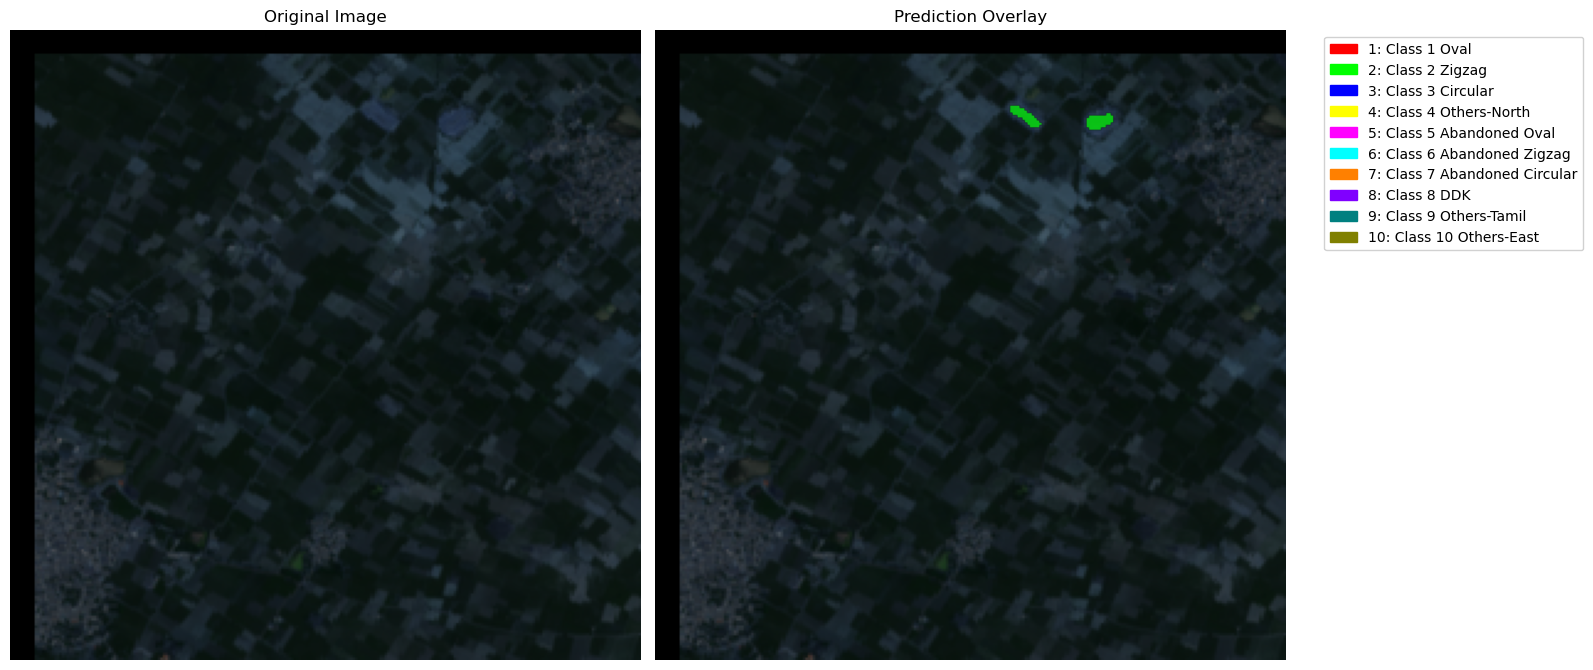

In [71]:
# %%
# Select random image-prediction pair
idx = random.randint(0, len(image_files))-1
image_path = os.path.join(IMAGE_DIR, image_files[idx])
pred_path = os.path.join(PREDICTION_DIR, f"pred_{image_files[idx]}")

print(f"Visualizing: {image_files[idx]}")

# %%
# Load data
rgb_image = load_image(image_path)
pred_mask = load_mask(pred_path)

# Create color mask
color_mask = np.zeros((*pred_mask.shape, 4))  # RGBA image
for class_id, color in COLOR_MAP.items():
    color_mask[pred_mask == class_id] = color
# %%
# Visualization
plt.figure(figsize=(16, 8))

# Original RGB image
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

# Overlay prediction
plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.imshow(color_mask)  # Overlay colored mask
plt.title('Prediction Overlay')
plt.axis('off')

# Create legend
legend_patches = []
for class_id, color in COLOR_MAP.items():
    if class_id == 0:  # Skip transparent background
        continue
    legend_patches.append(mpatches.Patch(
        color=color[:3],  # Use RGB only (ignore alpha)
        label=f"{class_id}: {CLASS_NAMES[class_id]}"
    ))

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    framealpha=0.9
)

plt.tight_layout(
)
plt.show()